Integrantes do grupo:

**Pedro de Paula Gonçalves - 2023003517**\
**Pedro Nogueira Barboza - 2023006500**

Importação de Bibliotecas

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st # para usar a função mean, median, mode, variance, stdev
import seaborn as sns # pode carregar datasets dentro da própria lib
from scipy.stats import binom # para poder realizar cálculos de distribuição binomial
from scipy.stats import poisson # para poder realizar cálculos de distribuição de poisson

## Análise Geográfica

In [107]:
# "geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"
dados_geograficos = pd.read_csv('olist_geolocation_dataset.csv') # esse dataset contém informações de localização onde os pedidos foram realizados

# "product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"
dados_dos_produtos = pd.read_csv('olist_products_dataset.csv') # esse dataset contém dados do id do produto, categoria do produto, tamanho do nome do produto, tamanho da descrição do produto, quantidade de fotos do produto, peso do produto, comprimento do produto, altura do produto e largura do produto

# "order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"
dados_dos_pedidos = pd.read_csv('olist_orders_dataset.csv') # esse dataset contém informações dos pedidos, como id do pedido, id do cliente, status do pedido, data de compra, data de aprovação, data de envio, data de entrega e data estimada de entrega

# "order_id","order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"
dados_dos_itens_do_pedido = pd.read_csv('olist_order_items_dataset.csv') # esse dataset contém dados do id do pedido, id do item do pedido, id do produto, id do vendedor, data limite de envio, preço e valor do frete

dado_dos_clientes = pd.read_csv('olist_customers_dataset.csv') 

avaliacoes =  pd.read_csv('olist_order_reviews_dataset.csv')

dados_geograficos.head()




,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Fazendo Merge dos datasets

In [108]:
todos_pedidos = pd.merge(dados_dos_pedidos, dados_dos_itens_do_pedido)

pedidos_e_produtos = pd.merge(todos_pedidos, dados_dos_produtos, on="product_id") # faz o merge dos datasets de pedidos e produtos com base no id do produto

dados_cliente_pedidos = pd.merge(todos_pedidos, dado_dos_clientes, on='customer_id')

dados_itens_pedidos_produtos = pd.merge(dados_dos_itens_do_pedido, dados_dos_produtos, on='product_id')

pedidos_produtos = pd.merge(dados_itens_pedidos_produtos, dados_cliente_pedidos, on='order_id')








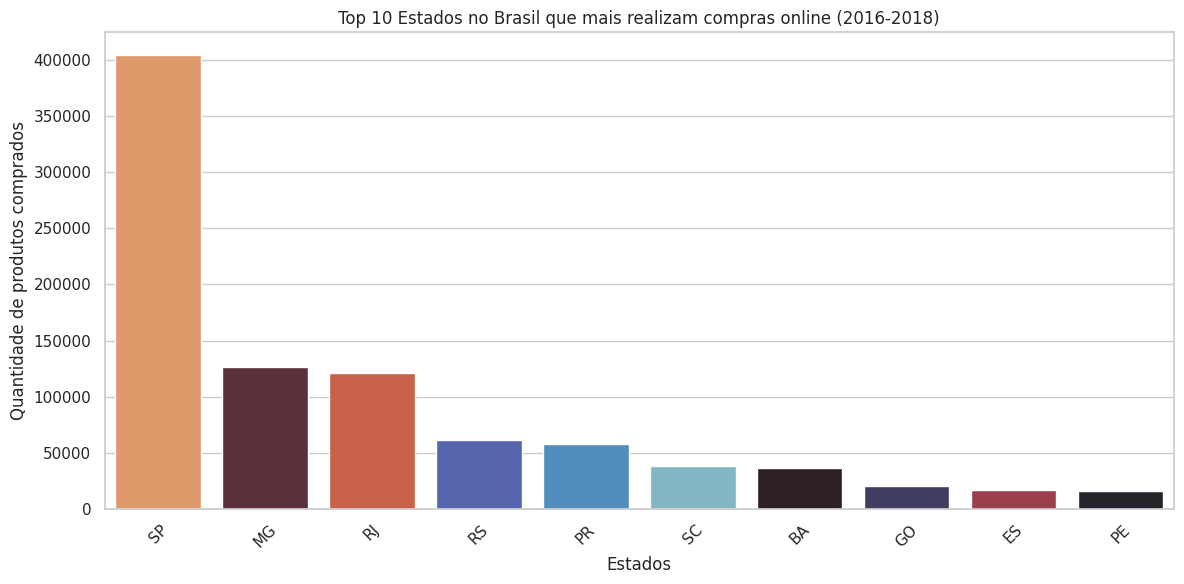

In [109]:
# Primeiro, obtenha os 10 estados com maiores contagens
top_10_estados = dados_geograficos['geolocation_state'].value_counts().nlargest(10).index

# Filtre os dados para incluir apenas esses estados
dados_top_10_estados = dados_geograficos[dados_geograficos['geolocation_state'].isin(top_10_estados)]

# Agora, crie o gráfico usando os dados filtrados
plt.figure(figsize=(12,6))
sns.countplot(x='geolocation_state', data=dados_top_10_estados, 
              order=dados_top_10_estados['geolocation_state'].value_counts().index, 
              palette='icefire_r', 
              hue='geolocation_state', 
              dodge=False,
              legend=False)
plt.title('Top 10 Estados no Brasil que mais realizam compras online (2016-2018)')
plt.xlabel('Estados')
plt.ylabel('Quantidade de produtos comprados')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove a legenda vazia
plt.tight_layout()
plt.show()


## Análise dos tipos de Produtos

In [110]:
# Upload Olist_Order_Items and Product Data
order_item_data = pd.read_csv('olist_order_items_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')

Juntando os arquivos de produtos e de vendas em um único dataframe

In [111]:
print(dados_dos_pedidos.isnull().sum())
# Como a quantidade de valores nulos é pequena, vamos remover as linhas com valores nulos

# Remover as linhas com valores nulos na coluna 'order_delivered_customer_date'
dados_dos_pedidos.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Verificar se ainda existem valores nulos
print(dados_dos_pedidos['order_delivered_customer_date'].isnull().sum())

pedidos_e_produtos.info()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_

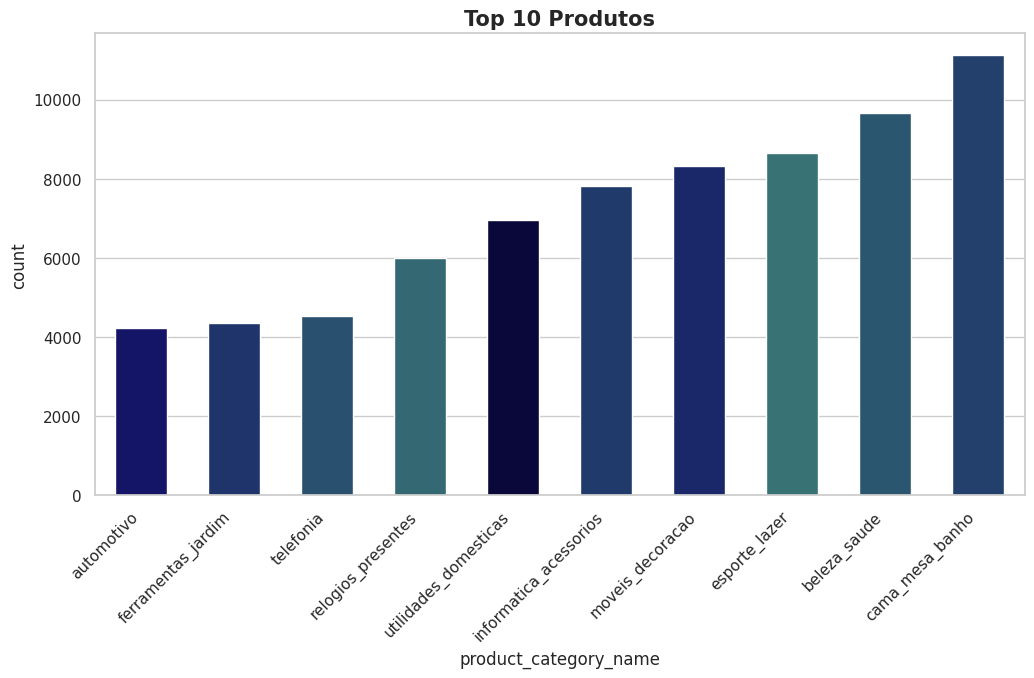

In [112]:
# Criar o gráfico
plt.figure(figsize=(12,6))
ax = sns.countplot(x='product_category_name', data=pedidos_e_produtos, palette='gist_earth',hue='product_category_name',
                   order=pedidos_e_produtos['product_category_name'].value_counts()[:10].sort_values().index)

# Definir o título do gráfico
ax.set_title("Top 10 Produtos", fontsize=15, weight='bold')

# Reduzir a largura de cada barra para aumentar o espaçamento
for patch in ax.patches:
    current_width = patch.get_width()
    new_width = current_width * 0.7  # Ajuste este valor conforme necessário (entre 0 e 1)
    diff = current_width - new_width

    # Aplicar a nova largura
    patch.set_width(new_width)

    # Ajustar a posição da barra para centralizá-la
    patch.set_x(patch.get_x() + diff / 2)

# Ajustar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  # Remove a legenda para não sobrecarregar o gráfico

# Exibir o gráfico
plt.show()


In [113]:
df = pd.read_csv('olist_order_payments_dataset.csv')
df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [114]:
# Contagem dos tipos de pagamento
payment_counts = df['payment_type'].value_counts()
# Verificar a presença do tipo de pagamento 'not_defined'
print(df['payment_type'].value_counts())
print()

# Remover as linhas onde 'payment_type' é 'not_defined'
df = df[df['payment_type'] != 'not_defined']

# Verificar novamente para confirmar a remoção
print(df['payment_type'].value_counts())


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64


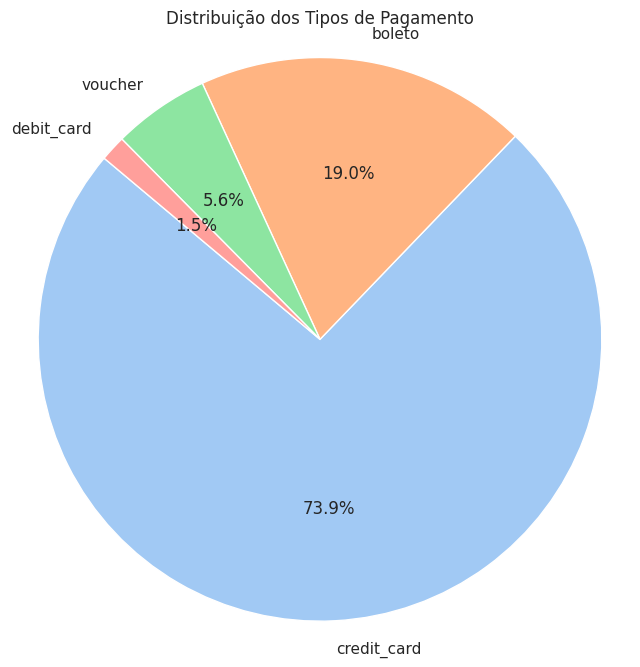

In [115]:
# Contar a frequência de cada tipo de pagamento
payment_counts = df['payment_type'].value_counts()

# Obter os labels e valores para o gráfico
labels = payment_counts.index
sizes = payment_counts.values

# Definir as cores (opcional)
colors = sns.color_palette('pastel')[0:len(labels)]

# Criar o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Configurações adicionais
plt.title('Distribuição dos Tipos de Pagamento')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

# Exibir o gráfico
plt.show()


In [116]:
# # Carregar datasets (ajuste os nomes dos arquivos conforme necessário)
# orders = pd.read_csv('olist_orders_dataset.csv')
# order_items = pd.read_csv('olist_order_items_dataset.csv')
# products = pd.read_csv('olist_products_dataset.csv')
# customers = pd.read_csv('olist_customers_dataset.csv')

# # Unir os DataFrames para obter as informações necessárias
# order_data = pd.merge(orders, customers, on='customer_id')
# order_items_data = pd.merge(order_items, products, on='product_id')
# product_orders = pd.merge(order_items_data, order_data, on='order_id')

# # Carregar datasets (ajuste os nomes dos arquivos conforme necessário)
# orders = pd.read_csv('olist_orders_dataset.csv')
# order_items = pd.read_csv('olist_order_items_dataset.csv') # dados_dos_itens_do_pedido
# products = pd.read_csv('olist_products_dataset.csv')
# customers = pd.read_csv('olist_customers_dataset.csv')

# # Unir os DataFrames para obter as informações necessárias
# dados_cliente_pedidos = pd.merge(dados_dos_pedidos, dado_dos_clientes, on='customer_id') # dados_cliente_pedidos

# order_items_data = pd.merge(dados_dos_itens_do_pedido, dados_dos_produtos, on='product_id') # dados_itens_pedidos_produtos

# product_orders = pd.merge(dados_itens_pedidos_produtos, dados_cliente_pedidos, on='order_id') # pedidos_produtos

In [117]:
def plot_top_products_pie_chart(df, state_code, top_n=5):
    # Filtrar os dados para o estado especificado
    df_state = df[df['customer_state'] == state_code]
    
    # Contar a frequência de cada produto
    product_counts = df_state['product_category_name'].value_counts()
    
    # Obter os top N produtos
    top_products = product_counts.nlargest(top_n)
    
    # Calcular a porcentagem
    top_products_percent = 100 * top_products / top_products.sum()
    
    # Criar o gráfico de pizza
    plt.figure(figsize=(8,8))
    plt.pie(top_products_percent, labels=top_products.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Produtos Mais Comprados em {state_code}')
    plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
    plt.show()

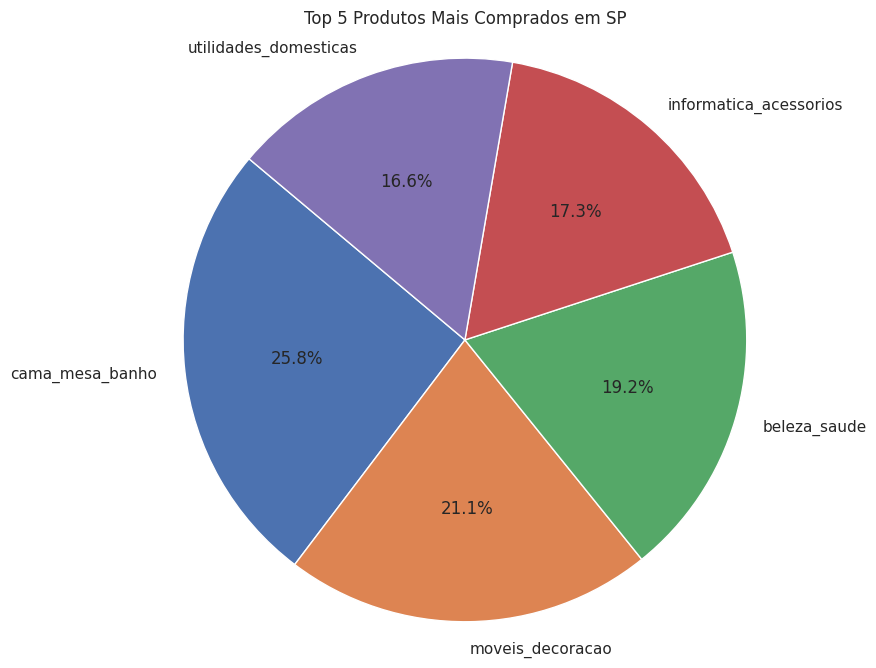

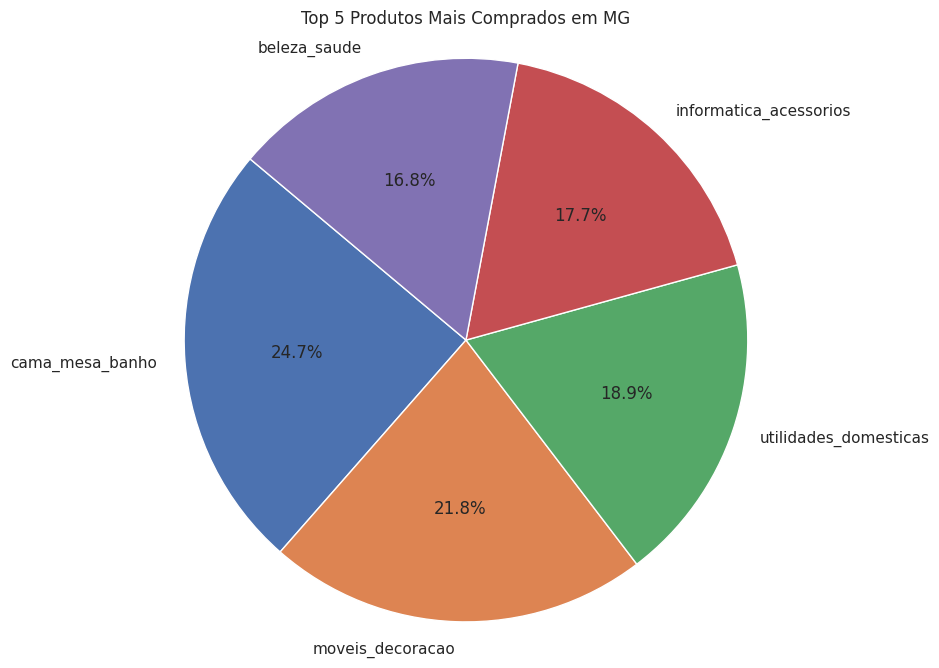

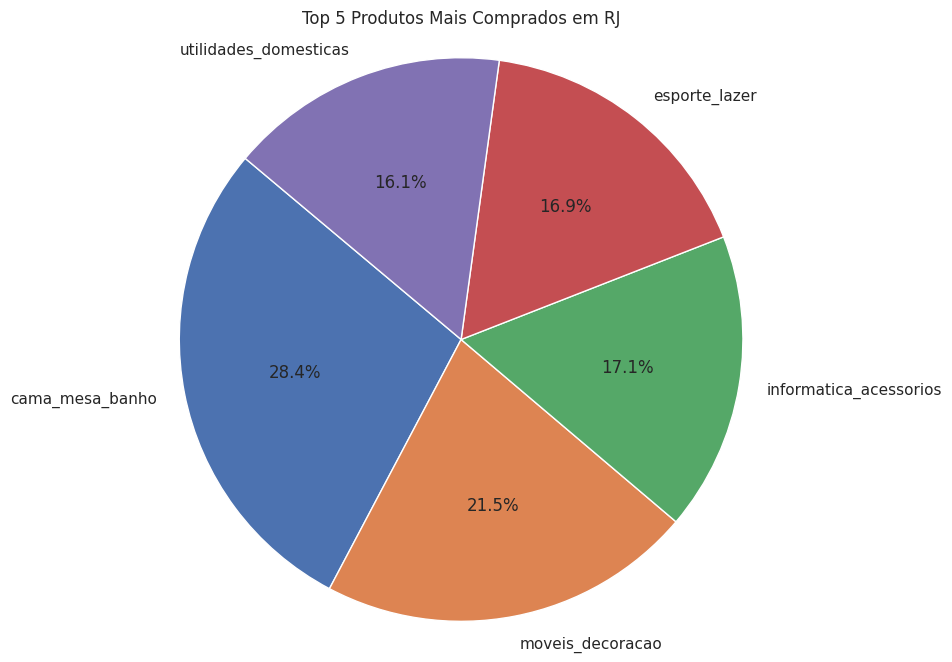

In [118]:
# Para São Paulo (SP)
plot_top_products_pie_chart(pedidos_produtos, 'SP')

# Para Minas Gerais (MG)
plot_top_products_pie_chart(pedidos_produtos, 'MG')

# Para Rio de Janeiro (RJ)
plot_top_products_pie_chart(pedidos_produtos, 'RJ')

   year  num_purchases
2  2016            370
1  2017          49765
0  2018          62511
3  2020              4


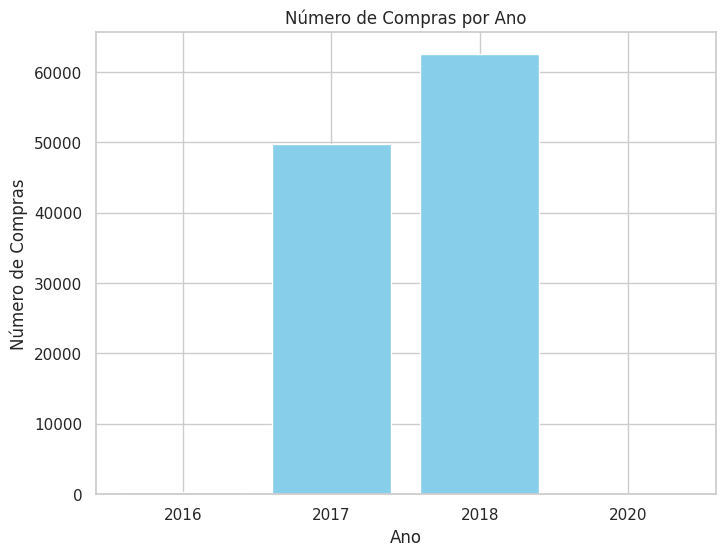

In [119]:

# Carregar o dataset
dados_dos_itens_do_pedido = pd.read_csv('olist_order_items_dataset.csv')


# Converter 'shipping_limit_date' para datetime
dados_dos_itens_do_pedido['shipping_limit_date'] = pd.to_datetime(dados_dos_itens_do_pedido['shipping_limit_date'])

# Extrair o ano
dados_dos_itens_do_pedido['year'] = dados_dos_itens_do_pedido['shipping_limit_date'].dt.year

# Contar compras por ano
purchases_per_year = dados_dos_itens_do_pedido['year'].value_counts().reset_index()
purchases_per_year.columns = ['year', 'num_purchases']
purchases_per_year = purchases_per_year.sort_values('year')

# Exibir os dados
print(purchases_per_year)

# Criar o gráfico
plt.figure(figsize=(8,6))
plt.bar(purchases_per_year['year'].astype(str), purchases_per_year['num_purchases'], color='skyblue')
plt.title('Número de Compras por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Compras')
plt.show()


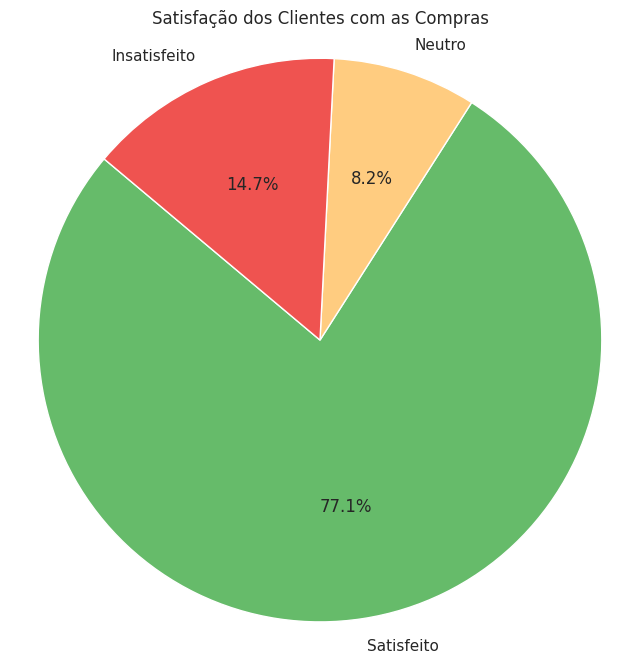

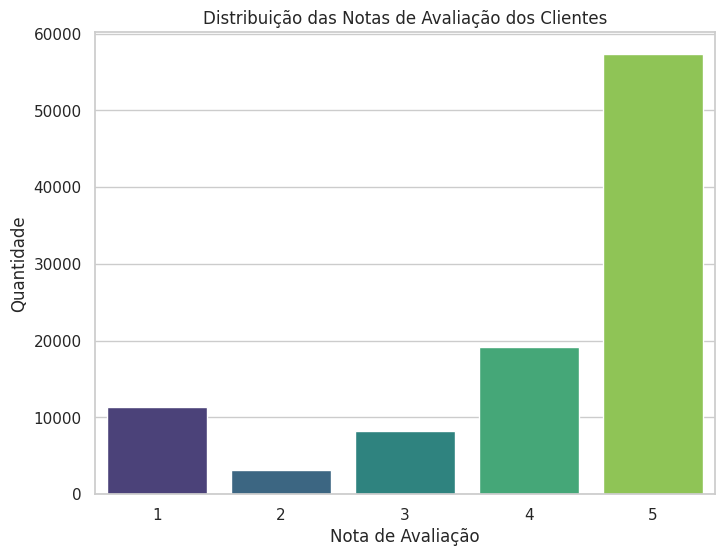

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset de avaliações
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Remover valores nulos em 'review_score', se houver
reviews = reviews.dropna(subset=['review_score'])

# Categorizar a satisfação do cliente
def categorize_satisfaction(score):
    if score >= 4:
        return 'Satisfeito'
    elif score == 3:
        return 'Neutro'
    else:
        return 'Insatisfeito'

reviews['satisfaction'] = reviews['review_score'].apply(categorize_satisfaction)

# Contar a frequência de cada categoria de satisfação
satisfaction_counts = reviews['satisfaction'].value_counts().reindex(['Satisfeito', 'Neutro', 'Insatisfeito'])

# Gráfico de Pizza
labels = satisfaction_counts.index
sizes = satisfaction_counts.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ffcc80', '#ef5350'])
plt.title('Satisfação dos Clientes com as Compras')
plt.axis('equal')
plt.show()

# Contar a frequência de cada nota de avaliação
score_counts = reviews['review_score'].value_counts().sort_index()

# Gráfico de Barras
labels = score_counts.index.astype(str)
sizes = score_counts.values

plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=sizes, palette='viridis', hue=labels)
plt.title('Distribuição das Notas de Avaliação dos Clientes')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Quantidade')
plt.show()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_time                    2965
dtype: int64


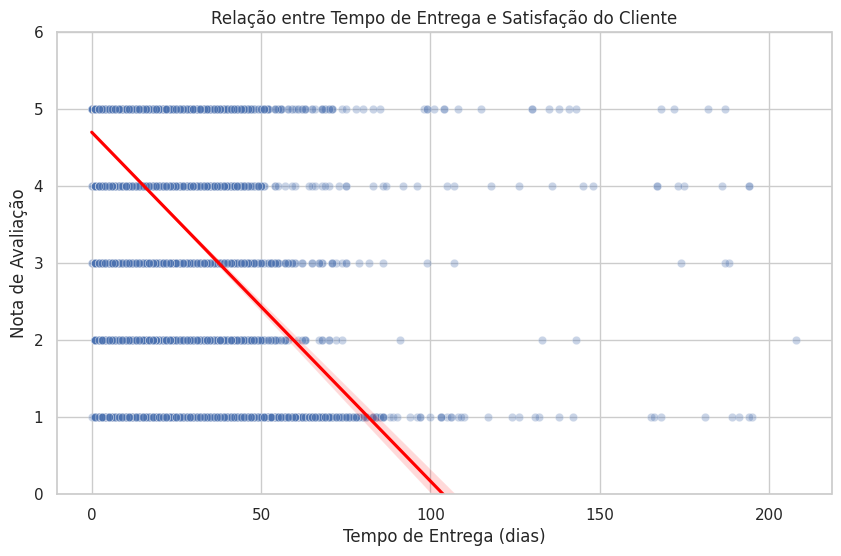

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
orders = pd.read_csv('olist_orders_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Converter colunas de data para datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Calcular o tempo de entrega em dias
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Remover registros inválidos
# Verificar valores nulos
print(orders.isnull().sum())

# Remover registros inválidos
orders = orders.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'])
orders = orders[orders['delivery_time'] >= 0]

# Unir os dados de pedidos com as avaliações
orders_reviews = pd.merge(orders, reviews[['order_id', 'review_score']], on='order_id')

# Gráfico de Dispersão
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x='delivery_time', y='review_score', data=orders_reviews, alpha=0.3)
sns.regplot(x='delivery_time', y='review_score', data=orders_reviews, scatter=False, color='red')
plt.title('Relação entre Tempo de Entrega e Satisfação do Cliente')
plt.ylim(0,6)  # Limitar o eixo Y entre 0 e 5, o intervalo esperado para a nota de avaliação

plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação')
plt.show()

